# Primer arbol de decisión con Scikit-Learn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv('titanic.csv', sep=",")

### EDA - exploratory data analysis

In [5]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [6]:
#Eliminar columnas que no generan valor. 
columns_to_drop = ['Name','Fare']
titanic.drop(columns_to_drop, axis = 'columns', inplace=True)

In [7]:
#Renombrar las columnas. 

titanic.columns = ['Survived','Pclass','Sex','Age','SibSp','Parch']
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [8]:
#Analizar el shape del objeto
print(titanic.shape)

(887, 6)


In [9]:
#Analizar los tipos de datos. 
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
dtype: object

In [10]:
#Cambiar tipos de datos.
titanic = pd.get_dummies(titanic, columns = ['Sex'], drop_first = True)

In [11]:
titanic.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Sex_male      uint8
dtype: object

In [12]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_male
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


In [13]:
#Reemplazar el Data Frame.
titanic.rename(columns = {'Sex_male':'Sex'}, inplace=True)

In [14]:
#Ordenar columnas por nombres. 
titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


### Entrenamiento del arbol de decisión con Scikit-learn

In [16]:
# Separamos en x - y
X = titanic.drop("Survived", axis=1) 
y = titanic.Survived

In [17]:
# Importación de librerias necesarias para la creación del modelo
from sklearn.model_selection import train_test_split

# 30% para el test y 70% para el train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 00000)
# random_state => Es la semilla. 

In [21]:
# Arbol de Decisión
from sklearn.tree import DecisionTreeClassifier

# Creación del modelo.
tree = DecisionTreeClassifier(max_depth = 2, random_state = 00000)

In [23]:
# Entrenamiento 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

### Evaluación del modelo.

In [25]:
#Calculo de las predicciones en Train y Test.
y_train_pred = tree.predict(X_train) 
y_test_pred = tree.predict(X_test)

In [26]:
# Calculo de metricas. 
from sklearn.metrics import accuracy_score

# Calculo del accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

# Caldulo del accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('El accuracy en TRAIN es: ', train_accuracy)
print('El accuracy en TEST es: ', test_accuracy)

El accuracy en TRAIN es:  0.8048387096774193
El accuracy en TEST es:  0.7640449438202247


C:\Users\chech\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


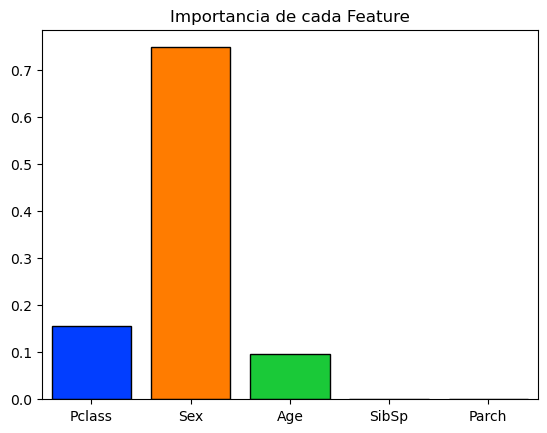

In [30]:
# Verificación del feature importances
import seaborn as sns

importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances, palette = 'bright', saturation = 2.0, edgecolor='black', linewidth=1)
plt.title('Importancia de cada Feature')
plt.show()